In [1]:
from fastai.text.all import *
import pandas as pd

In [2]:
df = pd.read_csv("expenses.csv")
df = df[['Description', 'Category']]

In [3]:
df['Category'] = df['Category'].astype('category')

print("Unique Categories:", df['Category'].unique())
print("Dataset size:", len(df))

Unique Categories: ['miscellaneous', 'food', 'transportation', 'healthcare', 'housing', 'entertainment', 'shopping']
Categories (7, object): ['entertainment', 'food', 'healthcare', 'housing', 'miscellaneous', 'shopping', 'transportation']
Dataset size: 2632


In [4]:
dls = TextDataLoaders.from_df(
    df,
    text_col='Description',
    label_col='Category',
    valid_pct=0.2,
    seed=42,
    bs=64
)

dls.show_batch(max_n=5)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


,text,category
0,"xxbos coffee at xxunk , xxunk and xxunk",food
1,"xxbos coffee at xxunk , xxunk and xxunk",food
2,"xxbos coffee at xxunk , xxunk and xxunk",food
3,xxbos over - the - counter medicines,healthcare
4,xxbos over - the - counter medicines,healthcare


In [5]:
learn = text_classifier_learner(dls, AWD_LSTM, metrics=accuracy)

In [6]:
learn.fine_tune(7)

epoch,train_loss,valid_loss,accuracy,time
0,1.613535,0.857719,0.859316,00:07


epoch,train_loss,valid_loss,accuracy,time
0,1.039203,0.474238,0.903042,00:11
1,0.846880,0.250627,0.944867,00:11
2,0.657643,0.149136,0.946768,00:11
3,0.501234,0.099195,0.973384,00:11
4,0.396812,0.074546,0.979087,00:12
5,0.322007,0.064561,0.980989,00:12
6,0.276710,0.064952,0.979087,00:12


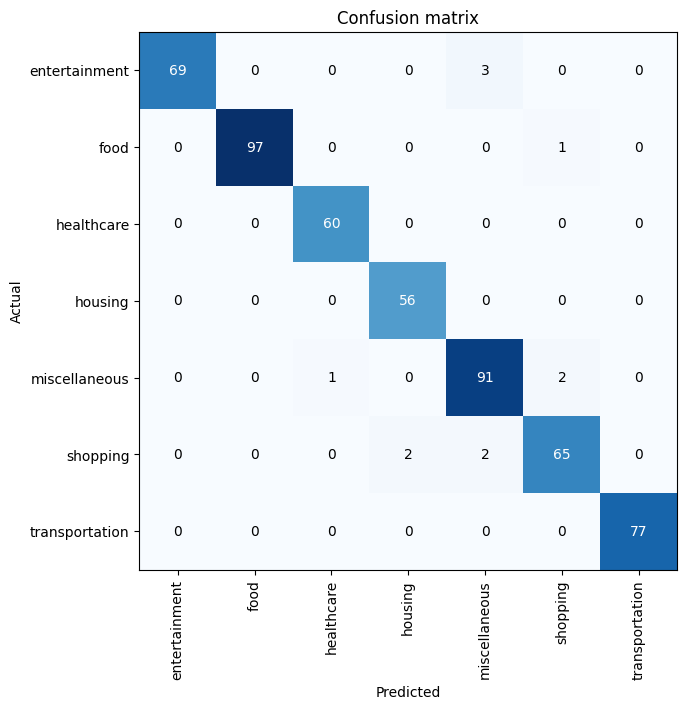

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(7,7))

In [8]:
test_text = "Mcdonald's Fries"
pred_class, pred_idx, probs = learn.predict(test_text)
print(f"Predicted: {pred_class}, Confidence: {probs[pred_idx]*100:.2f}%")

Predicted: food, Confidence: 96.58%


In [9]:
learn.export('model.pkl')

In [10]:
def test_model(texts):
    for t in texts:
        pred_class, pred_idx, probs = learn.predict(t)
        print(f"Input: {t}")
        print(f"➡ Predicted Category: {pred_class} | Confidence: {probs[pred_idx]*100:.2f}%")
        print("-" * 50)

In [11]:
test_cases = [
    # Food
    "kfc chicken burger",
    "dinner at McDonald's",
    "starbucks coffee latte",
    "pizza delivery from Domino's",

    # Transportation
    "uber ride to office",
    "gas station fuel refill",
    "taxi fare to airport",

    # Healthcare
    "dentist appointment",
    "hospital emergency visit",
    "pharmacy medicine purchase",

    # Shopping
    "amazon electronics purchase",
    "new sneakers from Nike store",
    "laptop bought online",

    # Entertainment
    "movie ticket booking",
    "netflix subscription renewal",
    "concert tickets purchase",

    # Miscellaneous
    "donation to charity",
    "hotel booking for vacation",
    "credit card annual fee",

    # Housing
    "monthly apartment rent payment",
    "electricity bill payment",
    "home insurance renewal"
]

test_model(test_cases)


Input: kfc chicken burger
➡ Predicted Category: food | Confidence: 99.57%
--------------------------------------------------


Input: dinner at McDonald's
➡ Predicted Category: food | Confidence: 99.28%
--------------------------------------------------


Input: starbucks coffee latte
➡ Predicted Category: food | Confidence: 98.53%
--------------------------------------------------


Input: pizza delivery from Domino's
➡ Predicted Category: food | Confidence: 99.40%
--------------------------------------------------


Input: uber ride to office
➡ Predicted Category: transportation | Confidence: 99.86%
--------------------------------------------------


Input: gas station fuel refill
➡ Predicted Category: transportation | Confidence: 97.64%
--------------------------------------------------


Input: taxi fare to airport
➡ Predicted Category: transportation | Confidence: 99.91%
--------------------------------------------------


Input: dentist appointment
➡ Predicted Category: healthcare | Confidence: 97.30%
--------------------------------------------------


Input: hospital emergency visit
➡ Predicted Category: healthcare | Confidence: 96.93%
--------------------------------------------------


Input: pharmacy medicine purchase
➡ Predicted Category: healthcare | Confidence: 75.56%
--------------------------------------------------


Input: amazon electronics purchase
➡ Predicted Category: shopping | Confidence: 98.10%
--------------------------------------------------


Input: new sneakers from Nike store
➡ Predicted Category: shopping | Confidence: 73.55%
--------------------------------------------------


Input: laptop bought online
➡ Predicted Category: entertainment | Confidence: 41.93%
--------------------------------------------------


Input: movie ticket booking
➡ Predicted Category: transportation | Confidence: 38.20%
--------------------------------------------------


Input: netflix subscription renewal
➡ Predicted Category: entertainment | Confidence: 98.40%
--------------------------------------------------


Input: concert tickets purchase
➡ Predicted Category: entertainment | Confidence: 49.04%
--------------------------------------------------


Input: donation to charity
➡ Predicted Category: miscellaneous | Confidence: 95.15%
--------------------------------------------------


Input: hotel booking for vacation
➡ Predicted Category: miscellaneous | Confidence: 54.19%
--------------------------------------------------


Input: credit card annual fee
➡ Predicted Category: miscellaneous | Confidence: 97.61%
--------------------------------------------------


Input: monthly apartment rent payment
➡ Predicted Category: housing | Confidence: 92.64%
--------------------------------------------------


Input: electricity bill payment
➡ Predicted Category: housing | Confidence: 59.00%
--------------------------------------------------


Input: home insurance renewal
➡ Predicted Category: housing | Confidence: 78.07%
--------------------------------------------------
